<a href="https://colab.research.google.com/github/WoogiWooks/NDSS_LAB/blob/main/%EC%82%AC%EA%B3%BC%ED%8C%80_%EC%B5%9C%EB%8C%80%EC%A7%81%EA%B2%BD%EC%B6%94%EC%B6%9C_%EB%B0%8F_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%97%91%EC%85%80%ED%99%94_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
다이번호 = [3, 4, 5, 6, 7]
정비품 = ["정품" "비품"]
각도 = [0, 45, 90, 135, 180, 225, 270, 315]

for angle in 각도:
  for O in 정비품:
    for Dai in 다이번호:
      if O = "정품":
        Dai랑 O로 경로 찾고 그 경로에 있는 사과번호 리스트로 뽑아냄
        ex. n다이, 비품이 들어간 경로를 모두 뽑고 슬라이싱으로 사과번호만 리스트로 뽑아냄 apple_num = []
        for apple in apple_num:
          new_dr = '/content/drive/MyDrive/사과팀'
          dai = str(Dai) + "다이"
          OXnum = str(O)+str(apple)
          img = "0-" + str(angle) + ".bmp"                # 저장할 엑셀 각도에 맞게 바꿔줘야함
          directory = os.path.join(new_dr, dai, OXnum, img)

          밑에 진행한 코드 한번에 진행  (단 각도에 맞게 엑셀 저장되도록 설정해주기)
          !!!!!!!!!!!!!!!!! 문제는 각각 이미지의 사과 이미지에 맞게 크기 설정해줘야 함  => 자르는 이유가 무엇?? 자르기전에 사진을 DF화 시켜서 조건걸어서(예를들어 0~10값과 같이 검정색과 가까운 값이 나타나는 행열번호를 찾아서 잘라내기 등)


      elif O = "비품":
        Dai랑 O로 경로 찾고 그 경로에 있는 사과번호 리스트로 뽑아냄
        ex. n다이, 비품이 들어간 경로를 모두 뽑고 슬라이싱으로 사과번호만 리스트로 뽑아냄 apple_num = []
        for apple in apple_num:
          new_dr = '/content/drive/MyDrive/사과팀'
          dai = str(Dai) + "다이"
          OXnum = str(O)+str(apple)
          img = "0-" + str(angle) + ".bmp"                # 저장할 엑셀 각도에 맞게 바꿔줘야함
          directory = os.path.join(new_dr, dai, OXnum, img)

          


    
    
 

In [ ]:
import os

new_dr = '/content/drive/MyDrive/사과팀'
dai = "4다이"
OXnum = "비품13"
img = "0-0.bmp"
directory = os.path.join(new_dr, dai, OXnum, img)

In [ ]:
if "비품" in OXnum:
  OorX = 0
else:
  OorX = 1

dai_num = int(dai[0])

if len(OXnum)==4:
  num = int(OXnum[2:4])
else:
  num = int(OXnum[-1])

In [ ]:
apple = cv2.imread(os.path.join(new_dr, dai, OXnum, img))
print(apple.shape)

(1544, 2064, 3)


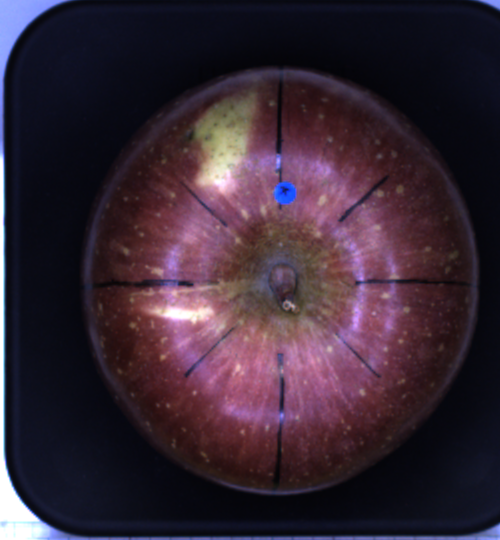

In [ ]:
cv2_imshow(apple[410:950, 750:1250])

In [ ]:
apple1 = apple[450:900, 770:1250]

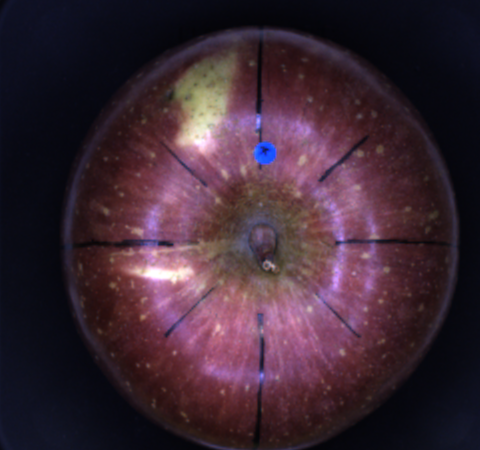

In [ ]:
cv2_imshow(apple1)

In [ ]:
apple1_gray = cv2.cvtColor(apple1, cv2.COLOR_BGR2GRAY)
#plt.imshow(apple1_gray, cmap='gray')


R = []
C = []
h = 15
for k in range(21): #이거 줄여서 조절
  thr = h
  ret, thresh1 = cv2.threshold(apple1_gray, thr, 255, cv2.THRESH_BINARY)
  ret, thresh2 = cv2.threshold(apple1_gray, thr, 255, cv2.THRESH_BINARY_INV)
  ret, thresh3 = cv2.threshold(apple1_gray, thr, 255, cv2.THRESH_TRUNC)
  ret, thresh4 = cv2.threshold(apple1_gray, thr, 255, cv2.THRESH_TOZERO)
  ret, thresh5 = cv2.threshold(apple1_gray, thr, 255, cv2.THRESH_TOZERO_INV)

  titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
  images = [apple1_gray, thresh1, thresh2, thresh3, thresh4, thresh5]

  for i in range(6):
  
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

  erosion = cv2.erode(thresh1, kernel, iterations=1)
  dilation = cv2.dilate(thresh1, kernel, iterations=1)

  opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
  closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)

  images = [thresh1, erosion, opening, thresh1, dilation, closing]
  titles = ['thresh1', 'Erosion', 'Opening',
            'thresh1', 'Dilation', 'Closing']

  a= dilation.shape[0]
  b= dilation.shape[1]

  def find_row(dataframe):
    for i in range(0, a):
      dataframe.loc[i, b] = dataframe.loc[i, :].sum()
    dataframe_row = dataframe.loc[:, b]
    return dataframe_row

  def find_column(dataframe1):
    for j in range(0, b):
      dataframe1.loc[a, j] = dataframe1.loc[:, j].sum()
    dataframe_column = dataframe1.loc[a, :]
    return dataframe_column

  from pandas import DataFrame
  appleFrame = DataFrame(dilation)

  row = find_row(appleFrame)
  column = find_column(appleFrame)

  appleFrame = DataFrame(dilation)

  from pandas import DataFrame
  appleFrame = DataFrame(dilation)
  thr_raw = appleFrame.loc[row.argmax(),:].value_counts()
  thr_col = appleFrame.loc[:,column.argmax()].value_counts()
  
  R.append(thr_raw[255])
  C.append(thr_col[255])
  h = h+1


In [ ]:
ex = []
for z in range(21):
 ex.append((z+15,R[z],C[z]))
 z=z+1

In [ ]:
ex

[(15, 404, 426),
 (16, 403, 426),
 (17, 403, 426),
 (18, 403, 426),
 (19, 403, 426),
 (20, 402, 426),
 (21, 402, 425),
 (22, 401, 425),
 (23, 401, 425),
 (24, 401, 425),
 (25, 401, 425),
 (26, 400, 425),
 (27, 396, 425),
 (28, 396, 424),
 (29, 396, 423),
 (30, 396, 421),
 (31, 395, 420),
 (32, 392, 419),
 (33, 386, 418),
 (34, 384, 418),
 (35, 383, 418)]

In [ ]:
import pandas as pd

df = pd.DataFrame(ex)
sheet_num = df[0]
R = df[1]
C = df[2]

In [ ]:
R

In [ ]:
C

**--------------------------------------**


In [ ]:
import sys
mod = sys.modules[__name__]

In [ ]:
for i in range(15, 36):
  j = str(i)
  setattr(mod, 'xl_{}'.format(j), pd.read_excel('/content/drive/MyDrive/사과팀/이미지 별 최대 픽셀_90도_함수빠짐.xlsx', sheet_name=j))

In [ ]:
n = 0
for i in range(15, 36):
  j= str(i)
  globals()['R_{0}'.format(i)] = R[n]
  globals()['C_{0}'.format(i)] = C[n]
  n+=1

In [ ]:
xl_15

In [ ]:
for j in range(15, 36):
  A = globals()['xl_{}'.format(j)]
  A.loc[(A.정1비0 == OorX)&(A.다이==dai_num)&(A.번호==num), ["픽셀 수(행)", "픽셀 수(열)"]] = globals()['R_{}'.format(j)], globals()['C_{}'.format(j)]
  globals()['xl_{}'.format(j)] = A

In [ ]:
# for j in range(15, 36):
# A = globals()['xl_{0}'.format(j)]
# B= globals()['R_{0}'.format(j)]
# C= globals()['C_{0}'.format(j)]
# A.loc[(A.정1비0 == OorX)&(A.다이==dai_num)&(A.번호==num), ["픽셀 수(행)", "픽셀 수(열)"]] = B, C
# globals()['xl_{0}'.format(j)] = A

In [ ]:
with pd.ExcelWriter("/content/drive/MyDrive/사과팀/이미지 별 최대 픽셀_90도.xlsx") as writer:
  for i in range(15, 36):
    j = str(i)
    globals()['xl_{}'.format(i)].to_excel(writer, sheet_name=j, index=False)

In [ ]:
# with pd.ExcelWriter("/content/drive/MyDrive/사과팀/이미지 별 최대 픽셀_90도.xlsx") as writer:
# xl_15.to_excel(writer, sheet_name="15", index=False)
# xl_16.to_excel(writer, sheet_name="16", index=False)
# xl_17.to_excel(writer, sheet_name="17", index=False)
# xl_18.to_excel(writer, sheet_name="18", index=False)
# xl_19.to_excel(writer, sheet_name="19", index=False)
# xl_20.to_excel(writer, sheet_name="20", index=False)
# xl_21.to_excel(writer, sheet_name="21", index=False)
# xl_22.to_excel(writer, sheet_name="22", index=False)
# xl_23.to_excel(writer, sheet_name="23", index=False)
# xl_24.to_excel(writer, sheet_name="24", index=False)
# xl_25.to_excel(writer, sheet_name="25", index=False)
# xl_26.to_excel(writer, sheet_name="26", index=False)
# xl_27.to_excel(writer, sheet_name="27", index=False)
# xl_28.to_excel(writer, sheet_name="28", index=False)
# xl_29.to_excel(writer, sheet_name="29", index=False)
# xl_30.to_excel(writer, sheet_name="30", index=False)
# xl_31.to_excel(writer, sheet_name="31", index=False)
# xl_32.to_excel(writer, sheet_name="32", index=False)
# xl_33.to_excel(writer, sheet_name="33", index=False)
# xl_34.to_excel(writer, sheet_name="34", index=False)
# xl_35.to_excel(writer, sheet_name="35", index=False)


In [ ]:
total_xl = []
for i in range(15, 36):
  total_xl.append(globals()["xl_{}".format(i)].columns)

num= 15
for j in total_xl:
  for i in j:
    if "Unnamed" in i:
      globals()['xl_{}'.format(num)].drop([str(i)], axis=1, inplace=True)
  num +=1

In [ ]:
# for i in xl_15.columns:
#     if "Unnamed" in i:
#       xl_15.drop([str(i)], axis=1, inplace=True)

#  for i in xl_16.columns:
#     if "Unnamed" in i:
#       xl_16.drop([str(i)], axis=1, inplace=True)

#  for i in xl_17.columns:
#     if "Unnamed" in i:
#       xl_17.drop([str(i)], axis=1, inplace=True)

#  for i in xl_18.columns:
#     if "Unnamed" in i:
#       xl_18.drop([str(i)], axis=1, inplace=True)


#  for i in xl_19.columns:
#     if "Unnamed" in i:
#       xl_19.drop([str(i)], axis=1, inplace=True)


#  for i in xl_20.columns:
#     if "Unnamed" in i:
#       xl_20.drop([str(i)], axis=1, inplace=True)


#  for i in xl_21.columns:
#     if "Unnamed" in i:
#       xl_21.drop([str(i)], axis=1, inplace=True)


#  for i in xl_22.columns:
#     if "Unnamed" in i:
#       xl_22.drop([str(i)], axis=1, inplace=True)


#  for i in xl_23.columns:
#     if "Unnamed" in i:
#       xl_23.drop([str(i)], axis=1, inplace=True)


#  for i in xl_24.columns:
#     if "Unnamed" in i:
#       xl_24.drop([str(i)], axis=1, inplace=True)


#  for i in xl_25.columns:
#     if "Unnamed" in i:
#       xl_25.drop([str(i)], axis=1, inplace=True)


#  for i in xl_26.columns:
#     if "Unnamed" in i:
#       xl_26.drop([str(i)], axis=1, inplace=True)


#  for i in xl_27.columns:
#     if "Unnamed" in i:
#       xl_27.drop([str(i)], axis=1, inplace=True)


#  for i in xl_28.columns:
#     if "Unnamed" in i:
#       xl_28.drop([str(i)], axis=1, inplace=True)


#  for i in xl_29.columns:
#     if "Unnamed" in i:
#       xl_29.drop([str(i)], axis=1, inplace=True)


#  for i in xl_30.columns:
#     if "Unnamed" in i:
#       xl_30.drop([str(i)], axis=1, inplace=True)


#  for i in xl_31.columns:
#     if "Unnamed" in i:
#       xl_31.drop([str(i)], axis=1, inplace=True)
      

#  for i in xl_32.columns:
#     if "Unnamed" in i:
#       xl_32.drop([str(i)], axis=1, inplace=True)

#  for i in xl_33.columns:
#     if "Unnamed" in i:
#       xl_33.drop([str(i)], axis=1, inplace=True)

#  for i in xl_34.columns:
#     if "Unnamed" in i:
#       xl_34.drop([str(i)], axis=1, inplace=True)

#  for i in xl_35.columns:
#     if "Unnamed" in i:
#       xl_35.drop([str(i)], axis=1, inplace=True)

In [ ]:
import openpyxl as op 
import sys
filepath = "/content/drive/MyDrive/사과팀/이미지 별 최대 픽셀_90도.xlsx"
mod = sys.modules[__name__]

wb = op.load_workbook(filepath)
for i in range(15, 36):
  setattr(mod, "ws_{}".format(i), wb[str(i)])    ## wb["{}".format(i)]

In [ ]:
total_ws = []
for i in range(15, 36):
  total_ws.append(globals()["ws_{}".format(i)])

In [ ]:
for j in total_ws:
  for i in range(2, 32):
    j["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
    j["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
    j["L"+str(i)] = "=F{0}-J{0}".format(i)
    j["M"+str(i)] = "=G{0}-K{0}".format(i)

In [ ]:
# for i in range(2, 32):
#   ws_15["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_15["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_15["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_15["M"+str(i)] = "=G{0}-K{0}".format(i)

# for i in range(2, 32):
#   ws_16["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_16["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_16["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_16["M"+str(i)] = "=G{0}-K{0}".format(i)

# for i in range(2, 32):
#   ws_17["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_17["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_17["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_17["M"+str(i)] = "=G{0}-K{0}".format(i)

# for i in range(2, 32):
#   ws_18["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_18["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_18["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_18["M"+str(i)] = "=G{0}-K{0}".format(i)

# for i in range(2, 32):
#   ws_19["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_19["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_19["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_19["M"+str(i)] = "=G{0}-K{0}".format(i)

# for i in range(2, 32):
#   ws_20["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_20["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_20["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_20["M"+str(i)] = "=G{0}-K{0}".format(i)

# for i in range(2, 32):
#   ws_21["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_21["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_21["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_21["M"+str(i)] = "=G{0}-K{0}".format(i)

# for i in range(2, 32):
#   ws_22["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_22["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_22["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_22["M"+str(i)] = "=G{0}-K{0}".format(i)

# for i in range(2, 32):
#   ws_23["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_23["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_23["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_23["M"+str(i)] = "=G{0}-K{0}".format(i)

# for i in range(2, 32):
#   ws_24["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_24["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_24["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_24["M"+str(i)] = "=G{0}-K{0}".format(i)

# for i in range(2, 32):
#   ws_25["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_25["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_25["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_25["M"+str(i)] = "=G{0}-K{0}".format(i)

# for i in range(2, 32):
#   ws_26["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_26["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_26["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_26["M"+str(i)] = "=G{0}-K{0}".format(i)

# for i in range(2, 32):
#   ws_27["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_27["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_27["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_27["M"+str(i)] = "=G{0}-K{0}".format(i)

# for i in range(2, 32):
#   ws_28["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_28["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_28["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_28["M"+str(i)] = "=G{0}-K{0}".format(i) 

# for i in range(2, 32):
#   ws_29["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_29["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_29["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_29["M"+str(i)] = "=G{0}-K{0}".format(i)  

# for i in range(2, 32):
#   ws_30["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_30["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_30["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_30["M"+str(i)] = "=G{0}-K{0}".format(i)  

# for i in range(2, 32):
#   ws_31["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_31["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_31["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_31["M"+str(i)] = "=G{0}-K{0}".format(i)  

# for i in range(2, 32):
#   ws_32["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_32["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_32["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_32["M"+str(i)] = "=G{0}-K{0}".format(i)  

# for i in range(2, 32):
#   ws_33["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_33["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_33["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_33["M"+str(i)] = "=G{0}-K{0}".format(i) 

# for i in range(2, 32):
#   ws_34["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_34["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_34["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_34["M"+str(i)] = "=G{0}-K{0}".format(i)  

# for i in range(2, 32):
#   ws_35["J"+str(i)] = "=ROUND(D{0}*I{0}, 2)".format(i)
#   ws_35["K"+str(i)] = "=ROUND(E{0}*H{0}, 2)".format(i)
#   ws_35["L"+str(i)] = "=F{0}-J{0}".format(i)
#   ws_35["M"+str(i)] = "=G{0}-K{0}".format(i)

In [ ]:
wb.save("/content/drive/MyDrive/사과팀/최종파이널수정본.xlsx")